In [64]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

## Get reward csv files for liftcube

In [65]:
# function to read csv into pd dataframe


def read_csv(model, task, runs, epi_col):
    directory = Path.cwd().parents[0]
    training_location = 'training/'
    reward_dir = directory / model / training_location / task

    data = pd.DataFrame()
    for run in runs:
        run_dir = reward_dir / str(run)
        run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
        # remove episode number column
        print(run_data.columns)
        run_data = run_data.drop(columns=epi_col)
        # rename reward column to "model + run"
        run_data = run_data.rename(
            columns={' Episode reward': model + '_' + str(run)})
        # concat with data from other runs
        data = pd.concat([data, run_data], axis=1)
        # create another column for the average reward
        data[model + '_avg'] = data.mean(axis=1)

    return data

drq_v2

In [66]:
model = "drq_v2"
task = "liftcube"
runs = [1,2,3]

drq_data = read_csv(model, task, runs, 'Episode num')

print(drq_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
      drq_v2_1  drq_v2_avg    drq_v2_2    drq_v2_3
0    13.532847   16.980102   27.848417    8.234441
1    38.887274   33.366147   15.683807   47.740721
2    66.080704   34.992474    5.676842   22.266267
3    19.849569   38.847887   50.459935   55.029020
4    20.683733   22.218386   31.244524   12.741291
..         ...         ...         ...         ...
994        NaN  304.170574  387.144384  138.222954
995        NaN  389.667318  389.335035  390.331883
996        NaN  399.764236  407.862688  383.567332
997        NaN  271.668529  205.597956  403.809675
998        NaN  408.721356  407.946253  410.271562

[999 rows x 4 columns]


sac

In [67]:
model = "sac"
task = "liftcube"

runs = [1,2,3]

sac_data = read_csv(model, task, runs, 'Episode number')
        
print(sac_data)

Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
          sac_1     sac_avg       sac_2       sac_3
0     51.348833   49.383495   67.378905   22.114051
1     32.202548   32.257986   12.919892   58.134509
2     63.770441   38.539354   19.458883   21.928168
3     28.221083   23.606919    8.254587   36.386422
4     51.972439   49.003955   30.196239   69.133437
..          ...         ...         ...         ...
945  311.130232  335.341097  294.677730  429.910361
946  232.190932  266.631487  336.479762  230.901377
947  286.960427  364.194099  417.200630  422.241512
948  300.157018  292.570289  359.059533  191.273417
949  427.008404  425.841354  422.650482  428.150769

[950 rows x 4 columns]


coit

In [68]:
model = "coit"
task = "liftcube"
directory = Path.cwd().parents[0]
training_location = 'training/'
reward_dir = directory / model/ training_location/ task

runs = [1, 2, 3]
runs = [1]

coit_data = pd.DataFrame()
for run in runs:
    run_dir = reward_dir / str(run)
    # run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    run_data = pd.read_csv('coit_data.csv')
    print(run_data.columns)
    # remove episode number column
    # run_data = run_data.drop(columns=['Episode num'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    coit_data = pd.concat([coit_data, run_data], axis=1)
    # create another column for the average reward
    coit_data[model + '_avg'] = coit_data.mean(axis=1)
        
print(coit_data)


Index(['Unnamed: 0', 'coit_1', 'coit_avg'], dtype='object')
     Unnamed: 0      coit_1    coit_avg
0             0   13.532847    9.021898
1             1   38.887274   26.258183
2             2   66.080704   44.720469
3             3   19.849569   14.233046
4             4   20.683733   15.122489
..          ...         ...         ...
725         725  163.201365  350.467577
726         726  158.065567  347.377045
727         727  206.333778  379.889186
728         728  151.054945  343.369964
729         729  150.845282  343.563521

[730 rows x 3 columns]


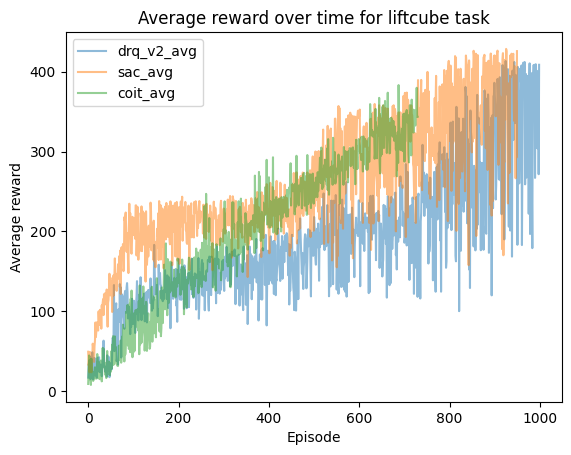

In [69]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for three models
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
ax.plot(coit_data['coit_avg'], label='coit_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for liftcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('liftcube.png')

## Get reward csv files for stackcube

drq_v2

In [70]:
model = "drq_v2"
task = "stackcube"


runs = [1, 2, 3]
drq_data = read_csv(model, task, runs, 'Episode num')

print(drq_data)


Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
Index(['Episode num', ' Episode reward'], dtype='object')
        drq_v2_1  drq_v2_avg    drq_v2_2    drq_v2_3
0     212.222144  229.456248  260.044503  217.395417
1     226.492097  234.031065  252.852598  221.500634
2     248.447022  237.401141  217.712271  245.243167
3     186.949407  211.481151  219.361466  241.860302
4     245.242071  257.795721  273.262736  258.095783
...          ...         ...         ...         ...
1494         NaN  311.907443  308.140030  319.442270
1495         NaN  253.846725  254.610061  252.320055
1496         NaN  335.177044  355.353047  294.825037
1497         NaN  294.075609  293.359635  295.507558
1498         NaN  239.123683  241.366443  234.638163

[1499 rows x 4 columns]


sac

In [71]:
model = "sac"
task = "stackcube"

runs = [1, 2, 3]

sac_data = read_csv(model, task, runs, 'Episode number')
print(sac_data)


Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
           sac_1     sac_avg       sac_2       sac_3
0     270.111046  259.035855  263.823288  234.193960
1     245.912287  242.783002  233.495934  249.950285
2     262.389610  237.462202  220.910236  217.985809
3     295.181613  245.291920  220.907664  194.654771
4     189.008491  207.384360  210.446831  233.927512
...          ...         ...         ...         ...
1445  324.077639  358.954411  359.683166  416.110693
1446  311.747018  301.356821  274.848683  319.384010
1447  333.707120  337.843039  333.850003  350.060285
1448  335.806030  486.230201  309.782520  972.200730
1449  343.276757  317.776369  373.205076  201.370780

[1450 rows x 4 columns]


coit

In [72]:
# model = "coit"
# task = "liftcube"

# runs = [1, 2, 3]

# coit_data = read_csv(model, task, runs, 'Episode number')
        
# print(coit_data)


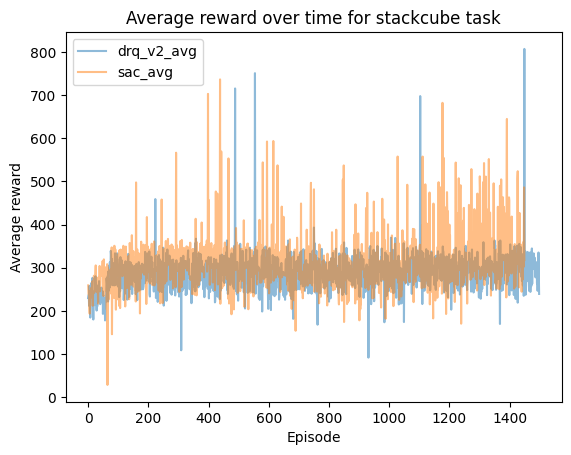

In [73]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for three models
ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# ax.plot(coit_data['coit_avg'], label='coit_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for stackcube task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('stackcube.png')

## Get reward csv files for turnfaucet

drq_v2

In [74]:
# model = "drq_v2"
# task = "turnfaucet-v1"
# directory = Path.cwd().parents[0]
# training_location = 'training/'
# reward_dir = directory / model / training_location / task

# runs = [1, 2, 3]
# drq_data = pd.DataFrame()
# for run in runs:
#     run_dir = reward_dir / str(run)
#     run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
#     # remove episode number column
#     print(run_data.columns)
#     run_data = run_data.drop(columns=['Episode num'])
#     # rename reward column to "model + run"
#     run_data = run_data.rename(
#         columns={' Episode reward': model + '_' + str(run)})
#     # concat with data from other runs
#     drq_data = pd.concat([drq_data, run_data], axis=1)
#     # create another column for the average reward
#     drq_data[model + '_avg'] = drq_data.mean(axis=1)

# print(drq_data)


sac

In [75]:
model = "sac"
task = "turnfaucet-v1"

# runs = [1, 2, 3]
runs = [1, 2]

sac_data = read_csv(model, task, runs, 'Episode number')

print(sac_data)


Index(['Episode number', ' Episode reward'], dtype='object')
Index(['Episode number', ' Episode reward'], dtype='object')
           sac_1     sac_avg      sac_2
0       9.304157    9.149485   8.840142
1      27.304169   24.082478  17.639096
2      20.070293   15.121586   5.224172
3      81.605042   55.679870   3.829524
4      38.291705   29.827974  12.900511
...          ...         ...        ...
1445  278.289173  278.289173        NaN
1446  112.942110  112.942110        NaN
1447  467.081783  467.081783        NaN
1448  512.504241  512.504241        NaN
1449  115.175096  115.175096        NaN

[1450 rows x 3 columns]


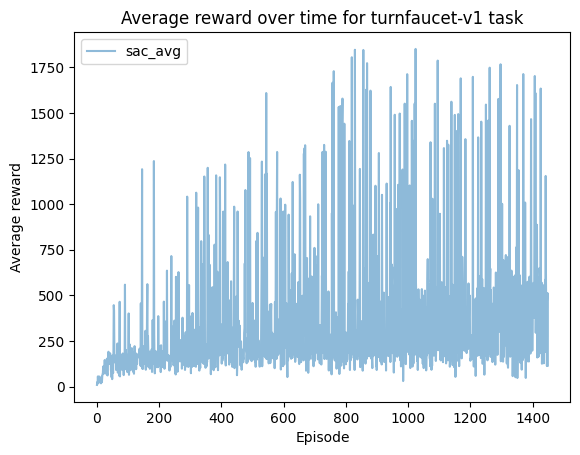

In [76]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for turnfaucet-v1 task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('turnfaucet-v1.png')

## Get reward csv files for peginsertion

drq_v2

In [77]:
# model = "drq_v2"
# task = "turnfaucet-v1"

# runs = [1, 2, 3]
# drq_data = read_csv(model, task, runs, 'Episode num')

# print(drq_data)


sac

In [78]:
model = "sac"
task = "peginsertion"
directory = Path.cwd().parents[0]
training_location = 'training/'
reward_dir = directory / model / training_location / task

runs = [1, 2, 3]
runs = [1]

sac_data = pd.DataFrame()
for run in runs:
    run_dir = reward_dir / str(run)
    run_data = pd.read_csv(run_dir / 'reward_and_length.csv')
    # remove episode number column
    run_data = run_data.drop(columns=['Episode number'])
    # rename reward column to "model + run"
    run_data = run_data.rename(
        columns={' Episode reward': model + '_' + str(run)})
    # concat with data from other runs
    sac_data = pd.concat([sac_data, run_data], axis=1)
    # create another column for the average reward
    sac_data[model + '_avg'] = sac_data.mean(axis=1)

print(sac_data)


            sac_1      sac_avg
0      215.862769   215.862769
1     -558.224552  -558.224552
2      -62.214873   -62.214873
3      217.485774   217.485774
4      226.379119   226.379119
...           ...          ...
2445  1163.212222  1163.212222
2446  1385.922608  1385.922608
2447  1259.217184  1259.217184
2448  1245.182785  1245.182785
2449  1213.368700  1213.368700

[2450 rows x 2 columns]


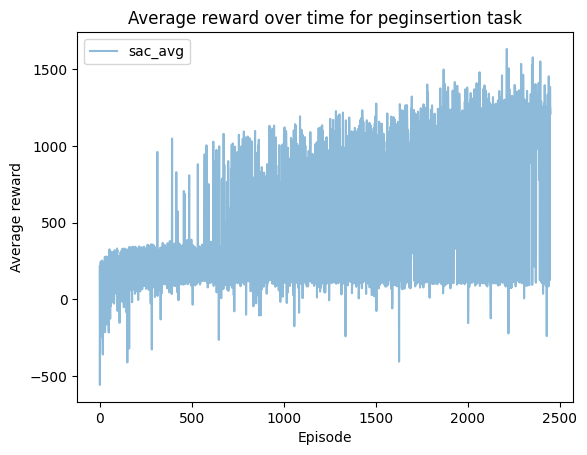

In [79]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for peginsertion task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('peginsertion.png')

## Get reward csv files for pushchair-v1

drq_v2

In [80]:
# model = "drq_v2"
# task = "pushchair-v1"

# runs = [1, 2, 3]
# drq_data = read_csv(model, task, runs, 'Episode num')

# print(drq_data)


sac

In [81]:
model = "sac"
task = "pushchair-v1"

runs = [1]

sac_data = read_csv(model, task, runs, 'Episode number')

print(sac_data)

Index(['Episode number', ' Episode reward'], dtype='object')
            sac_1      sac_avg
0    -2053.404709 -2053.404709
1    -2152.065097 -2152.065097
2    -2119.771392 -2119.771392
3    -2104.217990 -2104.217990
4    -2002.354495 -2002.354495
...           ...          ...
1359 -1269.853414 -1269.853414
1360 -1198.196435 -1198.196435
1361 -1155.468128 -1155.468128
1362 -1427.238187 -1427.238187
1363 -2088.424795 -2088.424795

[1364 rows x 2 columns]


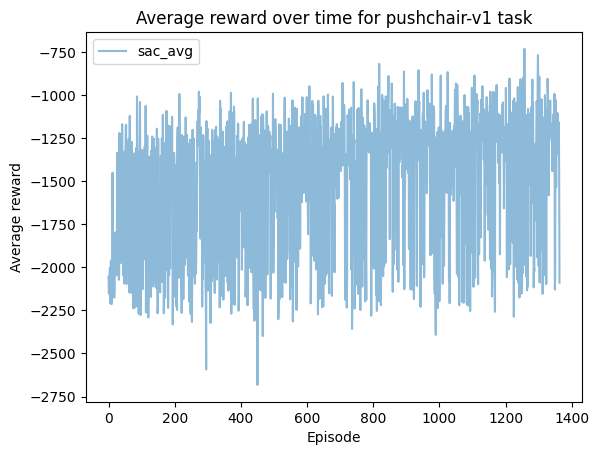

In [82]:
# plot the data

fig, ax = plt.subplots()
# change alpha value to make the lines more transparent\
# plot the average reward for two models
# ax.plot(drq_data['drq_v2_avg'], label='drq_v2_avg', alpha=0.5)
ax.plot(sac_data['sac_avg'], label='sac_avg', alpha=0.5)
# create a legend
ax.legend()
# set the title
ax.set_title('Average reward over time for pushchair-v1 task')
# set the x-axis label
ax.set_xlabel('Episode')
# set the y-axis label
ax.set_ylabel('Average reward')
# show the plot
plt.show()
# save the plot
fig.savefig('pushchair-v1.png')